## N차 과제 - API Scrapping_Reddit

- 주제: API를 활용한 데이터 불러오기 및 분석
- 데이터: 커뮤니티 텍스트 데이터(API 활용)
- 사용 라이브러리: praw, wordcloud, seaborn, nltk

### 1. 라이브러리 및 API 설정

1.1 미국 최대 커뮤니티 중 하나인 레딧(Reddit)에서 데이터를 불러오기 위해 praw 라이브러리를 install 해야 합니다.

In [84]:
!pip install praw

1.2 라이브러리 설정

In [85]:
import praw
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter

1.3 자연어처리를 위해 사용할 nltk 패키지를 다운로드하겠습니다(NLP 과제가 아니므로 자세히 살펴보지는 않겠습니다).

궁금하신 분들을 위해!
https://datascienceschool.net/03%20machine%20learning/03.01.01%20NLTK%20%EC%9E%90%EC%97%B0%EC%96%B4%20%EC%B2%98%EB%A6%AC%20%ED%8C%A8%ED%82%A4%EC%A7%80.html

In [86]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

1.4 API 인증을 받겠습니다. 절차의 경우 추가로 첨부한 자료를 참고해주세요.
### **과제를 제출할 때는 본 항목의 API 키들은 모두 지우고 제출해주세요! 공유되면 안 됩니다.**

In [87]:
#Reddit API 인증
reddit = praw.Reddit(
    client_id='',
    client_secret='',
    user_agent=''
)

### 2. 데이터 수집 및 분석

2.1 본격적으로 API를 활용해 데이터를 불러오겠습니다. 먼저 subreddit을 'stocks'로 설정하고 엔비디아 주식에 대한 게시글을 가져오겠습니다.

In [88]:
subreddit_name = 'stocks' # stocks라는 서브레딧을 검색 대상으로 지정
search_query = 'NVIDIA OR NVDA' # 텍스트를 포함하는 포스트 찾기
subreddit = reddit.subreddit(subreddit_name)
top_posts = subreddit.search(search_query, limit=300, sort='top')

- subreddit.search() : 지정된 서브레딧에서 검색
- limit=300 : 검색 결과 최대 300개
- sort = 'top : 인기 많은 포스트를 상단에 정렬

2.2 가져온 데이터를 제목과 내용으로 분리된 데이터프레임으로 변환하세요.

In [89]:
posts_data = []
for post in top_posts :
    posts_data.append({
        'title' : post.title, # 제목 추출
        'text' : post.selftext # 텍스트 추출 (selftext : 본문)
    })

# posts_data

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.

It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



In [90]:
df = pd.DataFrame(posts_data)
df[:100] # 앞에 100개만 보여주기

,title,text
0,A note to young investors (or new investors),As the Fed caused a bit of a ripple in the mar...
1,To all of you who are red this year while the ...,Lately I keep hearing the same old narrative f...
2,Pelosi's husband buying over $1 million of com...,[Full Article](https://www.msn.com/en-us/tv/ne...
3,Beware of what AMC shorts are holding!,I understand that most people in this thread i...
4,Blackberry -- A Dormant Giant,###**Abbreviation Index:**\n\nBB -- Blackberry...
...,...,...
95,Nvidia says it didn’t receive antitrust subpoe...,\n\nNvidia on Wednesday denied reports it rece...
96,Nvdia to stop all product sales to Russia,Nvidia on Friday said it’s halting all product...
97,Potential big tech stocks shopping list today,The nasdaq is dropping about 2.5% as of right ...
98,WSJ - S&P 500 ends longest bear market since t...,"U.S. stocks rose Thursday, ending the S&P 500’..."


2.3 가져온 데이터를 토큰화, 불용어 제거 등 분석에 활용하기 위한 전처리를 진행하세요.

In [91]:
# 데이터프레임['칼럼'].apply(함수명) : 데이터 프레임 변환

In [92]:
def tokenize(text) :
    return word_tokenize(text.lower()) # 소문자로 벼노한하고 토큰화 진행

df['title'] = df['title'].apply(tokenize)
df['text'] = df['text'].apply(tokenize)

df

,title,text
0,"[a, note, to, young, investors, (, or, new, in...","[as, the, fed, caused, a, bit, of, a, ripple, ..."
1,"[to, all, of, you, who, are, red, this, year, ...","[lately, i, keep, hearing, the, same, old, nar..."
2,"[pelosi, 's, husband, buying, over, $, 1, mill...","[[, full, article, ], (, https, :, //www.msn.c..."
3,"[beware, of, what, amc, shorts, are, holding, !]","[i, understand, that, most, people, in, this, ..."
4,"[blackberry, --, a, dormant, giant]","[#, #, #, *, *, abbreviation, index, :, *, *, ..."
...,...,...
230,"[here, is, a, market, recap, for, today, thurs...","[*, *, psychomarket, recap, -, thursday, ,, no..."
231,"[tsmc, sales, grow, 45, %, in, july, on, stron...","[(, bloomberg, ), --, taiwan, semiconductor, m..."
232,"[meta, still, the, cheapest, of, the, magnific...","[quick, glance, at, some, of, the, numbers, fo..."
233,"[made, 30, %, since, i, started, trading, 7, m...","[hello, folks, ,, i, am, a, 24, year, old, who..."


In [93]:
# NLTK 불용어 확인
from string import punctuation

stop_plus = ['https', "'s", '--', '“', "'", "’", '”'] # 추가적으로 보이는 것들도 제거
stop_words_list = stopwords.words('english') + list(punctuation) + stop_plus # 특수문자 처리 : list(punctuation)
print('불용어 개수 :', len(stop_words_list))
print('불용어 10개 출력 :',stop_words_list[:10])

불용어 개수 : 218
불용어 10개 출력 : ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [94]:
df

,title,text
0,"[a, note, to, young, investors, (, or, new, in...","[as, the, fed, caused, a, bit, of, a, ripple, ..."
1,"[to, all, of, you, who, are, red, this, year, ...","[lately, i, keep, hearing, the, same, old, nar..."
2,"[pelosi, 's, husband, buying, over, $, 1, mill...","[[, full, article, ], (, https, :, //www.msn.c..."
3,"[beware, of, what, amc, shorts, are, holding, !]","[i, understand, that, most, people, in, this, ..."
4,"[blackberry, --, a, dormant, giant]","[#, #, #, *, *, abbreviation, index, :, *, *, ..."
...,...,...
230,"[here, is, a, market, recap, for, today, thurs...","[*, *, psychomarket, recap, -, thursday, ,, no..."
231,"[tsmc, sales, grow, 45, %, in, july, on, stron...","[(, bloomberg, ), --, taiwan, semiconductor, m..."
232,"[meta, still, the, cheapest, of, the, magnific...","[quick, glance, at, some, of, the, numbers, fo..."
233,"[made, 30, %, since, i, started, trading, 7, m...","[hello, folks, ,, i, am, a, 24, year, old, who..."


In [95]:
def stopping_words(text) :
    result = []
    for word in text :
        if word not in stop_words_list :
            result.append(word)
    return result

df['title'] = df['title'].apply(stopping_words)
df['text'] = df['text'].apply(stopping_words)

In [96]:
df

,title,text
0,"[note, young, investors, new, investors]","[fed, caused, bit, ripple, market, today, cons..."
1,"[red, year, p500, 30]","[lately, keep, hearing, old, narrative, beat-d..."
2,"[pelosi, husband, buying, 1, million, computer...","[full, article, //www.msn.com/en-us/tv/news/cn..."
3,"[beware, amc, shorts, holding]","[understand, people, thread, invest, safely, n..."
4,"[blackberry, dormant, giant]","[abbreviation, index, bb, blackberry, aws, ama..."
...,...,...
230,"[market, recap, today, thursday, november, 18,...","[psychomarket, recap, thursday, november, 18, ..."
231,"[tsmc, sales, grow, 45, july, strong, ai, chip...","[bloomberg, taiwan, semiconductor, manufacturi..."
232,"[meta, still, cheapest, magnificent, 7, wrong]","[quick, glance, numbers, meta, eps, crazy, goo..."
233,"[made, 30, since, started, trading, 7, months,...","[hello, folks, 24, year, old, started, working..."


2.4 전처리된 데이터를 활용해 어떤 단어가 가장 많이 나왔는지 WordCloud를 통해 확인하세요.

In [97]:
all_words = df['title'].sum() + df['text'].sum()
word_counts = Counter(all_words)

In [98]:
wordColud = WordCloud(
    width = 800,
    height = 400,
    max_font_size = 500,
    background_color = 'white'
).generate_from_frequencies(word_counts)

(-0.5, 799.5, 399.5, -0.5)

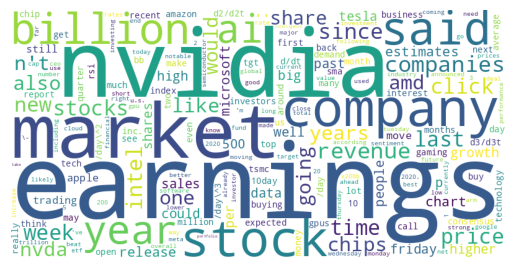

In [99]:
plt.figure()
plt.imshow(wordColud)
plt.axis('off')

2.6 가장 많이 나온 단어에는 어떤 것들이 있는지 barplot을 그려 확인하세요.

In [100]:
N = 500 # 상위 20개 단어 출력할거임
most_word = word_counts.most_common(N) # most_common은 최빈갑을 구하는걸로 colletions 모듈 안 함수
most_word_df = pd.DataFrame(most_word, columns = ['word', 'count'])
most_word_df

,word,count
0,earnings,693
1,nvidia,560
2,market,516
3,company,476
4,stock,456
5,said,387
6,billion,371
7,year,320
8,ai,306
9,companies,289


<ipython-input-101-7c22f29a1519>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data = most_word_df, palette=colors)
<ipython-input-101-7c22f29a1519>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='count', y='word', data = most_word_df, palette=colors)


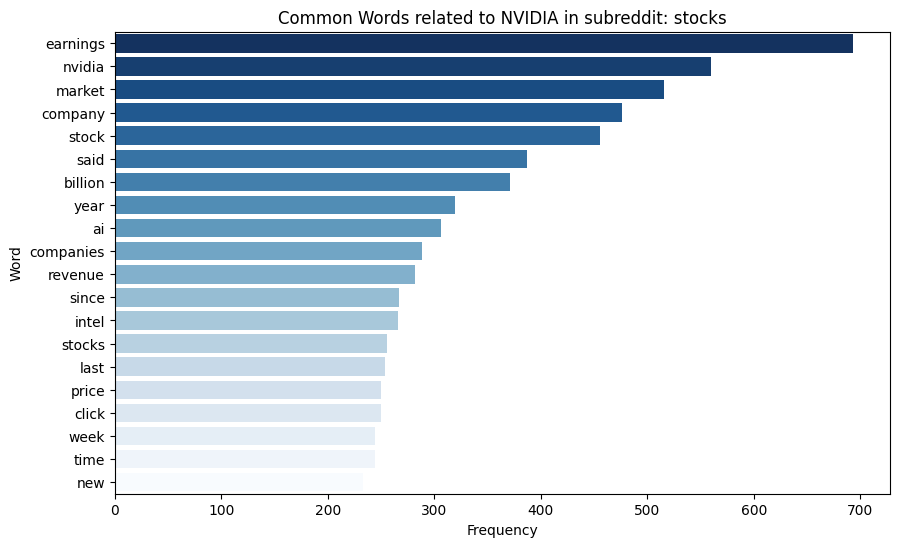

In [101]:
colors = sns.color_palette('Blues', as_cmap= True)(np.linspace(1, 0, len(most_word_df)))
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data = most_word_df, palette=colors)
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.title('Common Words related to NVIDIA in subreddit: stocks')
plt.show()

# **제출 시 API 인증 부분의 id, secret은 모두 지우고 제출해주세요!**

### 3. 자유 분석

위에서 진행한 분석만으로는 유의미한 인사이트를 도출하기는 어렵습니다. 추가적인 분석을 통해 해당 주식에 대한 평가가 긍정적인지, 또는 어떠한 이슈가 있는지 확인하는 것과 같은 추가적인 분석을 진행해주세요. 게시글이 아닌 리뷰를 가져오는 것도 가능합니다.

또한 본 분석에서 사용한 데이터가 아닌 다른 데이터를 활용하거나 또 다른 커뮤니티 혹은 사이트에서 API를 받아와 새로운 주제를 가지고 분석하는 것도 좋습니다:)

In [125]:
N = 1000 # 상위 1000개 단어 출력할거임
most_word2 = word_counts.most_common(N) # most_common은 최빈값을 구하는걸로 colletions 모듈 안 함수
most_word_df2 = pd.DataFrame(most_word2, columns = ['word', 'count'])

most_word_df2

,word,count
0,earnings,693
1,nvidia,560
2,market,516
3,company,476
4,stock,456
...,...,...
995,executive,14
996,shift,14
997,falling,14
998,cycle,14


In [115]:
!pip install vaderSentiment

In [126]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [127]:
analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    score = analyzer.polarity_scores(text)
    return score['compound']  # compound -1 : 부정 / +1 : 긍정

most_word_df2['Sentiment'] = most_word_df2['word'].apply(get_sentiment) # 감성 점수 추가

most_word_df2['Sentiment_result'] = most_word_df2['Sentiment'].apply(
    lambda x: 'Positive' if x > 0.05 else ('Negative' if x < -0.05 else 'Neutral')) # 감성 점수에 따른 중립 / 부정 / 긍정

most_word_df2

,word,count,Sentiment,Sentiment_result
0,earnings,693,0.0000,Neutral
1,nvidia,560,0.0000,Neutral
2,market,516,0.0000,Neutral
3,company,476,0.0000,Neutral
4,stock,456,0.0000,Neutral
...,...,...,...,...
995,executive,14,0.0000,Neutral
996,shift,14,0.0000,Neutral
997,falling,14,-0.1531,Negative
998,cycle,14,0.0000,Neutral


In [136]:
sentiment_counts = most_word_df2['Sentiment_result'].value_counts().reset_index()
sentiment_counts

,Sentiment_result,count
0,Neutral,910
1,Positive,64
2,Negative,26


<ipython-input-138-ddce40e800b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sentiment_result', y='count', data=sentiment_counts, palette = {'Positive' : 'green', 'Negative' : 'red', 'Neutral' : 'gray'})


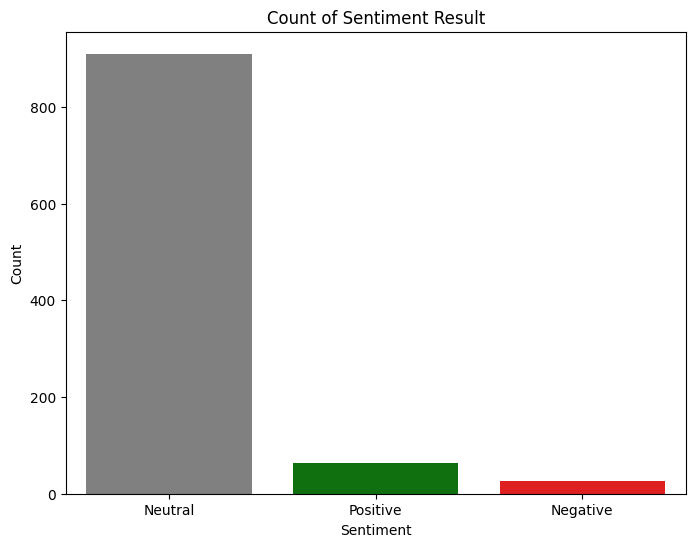

In [138]:
plt.figure(figsize=(8,6))
sns.barplot(x='Sentiment_result', y='count', data=sentiment_counts, palette = {'Positive' : 'green', 'Negative' : 'red', 'Neutral' : 'gray'})
plt.title('Count of Sentiment Result')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [143]:
most_word_df2

,word,count,Sentiment,Sentiment_result
0,earnings,693,0.0000,Neutral
1,nvidia,560,0.0000,Neutral
2,market,516,0.0000,Neutral
3,company,476,0.0000,Neutral
4,stock,456,0.0000,Neutral
...,...,...,...,...
995,executive,14,0.0000,Neutral
996,shift,14,0.0000,Neutral
997,falling,14,-0.1531,Negative
998,cycle,14,0.0000,Neutral


In [144]:
top_10_pos = most_word_df2[most_word_df2['Sentiment_result'] == 'Positive'].nlargest(10, 'count')[['word', 'count']]

In [145]:
top_10_neg = most_word_df2[most_word_df2['Sentiment_result'] == 'Negative'].nlargest(10, 'count')[['word', 'count']]

In [146]:
print('Top 10 Postive')
print(top_10_pos)

Top 10 Postive
         word  count
21       like    216
29      share    187
31     growth    180
40     shares    149
49       well    135
57     amazon    119
84        top    101
94   interest     97
117      good     81
132    number     76


<ipython-input-147-aa0411d254ad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data = top_10_pos, palette=colors)
<ipython-input-147-aa0411d254ad>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='count', y='word', data = top_10_pos, palette=colors)
<ipython-input-147-aa0411d254ad>:3: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  sns.barplot(x='count', y='word', data = top_10_pos, palette=colors)


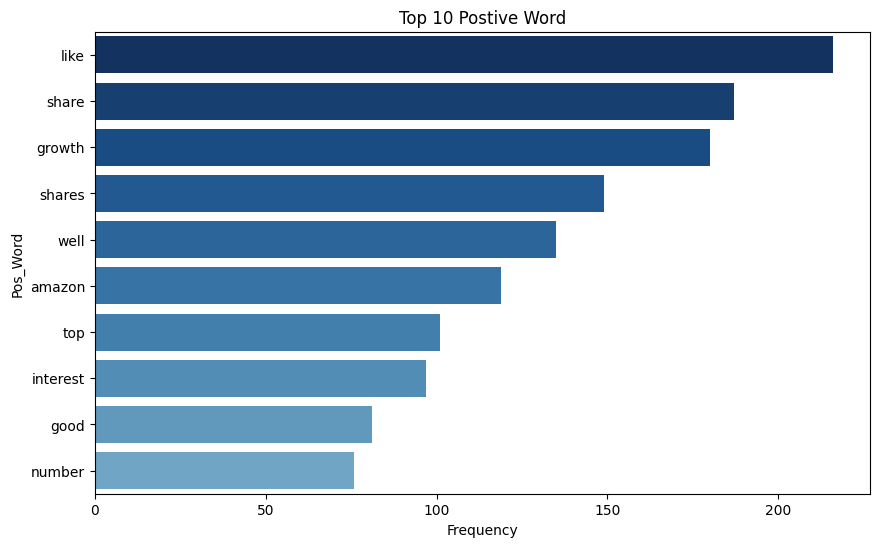

In [147]:
colors = sns.color_palette('Blues', as_cmap= True)(np.linspace(1, 0, len(most_word_df)))
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data = top_10_pos, palette=colors)
plt.xlabel('Frequency')
plt.ylabel('Pos_Word')
plt.title('Top 10 Postive Word')
plt.show()

In [148]:
print('Top 10 Negative')
print(top_10_neg)

Top 10 Negative
       word  count
104  demand     87
157     low     71
162   lower     68
397    loss     34
416     pay     32
442     cut     31
518    hard     27
547    lost     26
556     bad     25
558    drop     25


<ipython-input-149-b477dcc40a5b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data = top_10_neg, palette=colors)
<ipython-input-149-b477dcc40a5b>:3: UserWarning: Numpy array is not a supported type for `palette`. Please convert your palette to a list. This will become an error in v0.14
  sns.barplot(x='count', y='word', data = top_10_neg, palette=colors)
<ipython-input-149-b477dcc40a5b>:3: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  sns.barplot(x='count', y='word', data = top_10_neg, palette=colors)


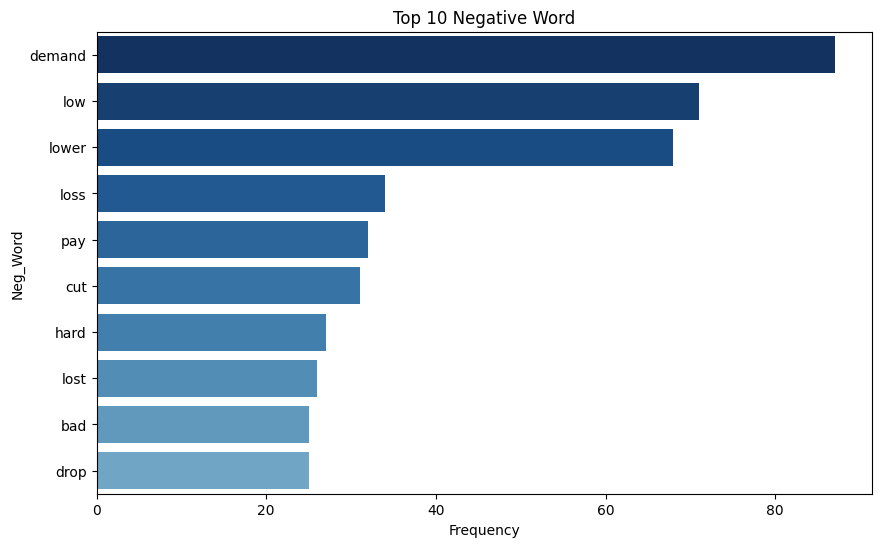

In [149]:
colors = sns.color_palette('Blues', as_cmap= True)(np.linspace(1, 0, len(most_word_df)))
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data = top_10_neg, palette=colors)
plt.xlabel('Frequency')
plt.ylabel('Neg_Word')
plt.title('Top 10 Negative Word')
plt.show()